In [11]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
file_path = "iperf3_processed_cubic.csv"

In [13]:
df = pd.read_csv(file_path)
df

,Interval,Transfer (MB),Bitrate (Mbps),Retransmissions,CWND (KB)
0,0.00-1.00,451.0,3780.0,152,665.0
1,1.00-2.00,400.0,3360.0,43,718.0
2,2.00-3.00,424.0,3560.0,35,605.0
3,3.00-4.00,385.0,3220.0,33,684.0
4,4.00-5.01,394.0,3270.0,18,595.0
5,5.01-6.00,386.0,3270.0,11,810.0
6,6.00-7.00,461.0,3870.0,25,631.0
7,7.00-8.00,362.0,3040.0,52,567.0
8,8.00-9.01,422.0,3530.0,60,516.0
9,9.01-10.00,408.0,3440.0,18,632.0


In [16]:
# Assuming df is your DataFrame
# Convert Transfer from MB to bits (MB -> Bytes -> Bits)
df["Data (bits)"] = df["Transfer (MB)"] * 8 * 1_000_000  # MB to bits

# Extract time interval duration
def calculate_interval_duration(interval):
    start, end = map(float, interval.split('-'))
    return end - start

df["Interval Duration (s)"] = df["Interval"].apply(calculate_interval_duration)

# Calculate throughput (in Mbps)
df["Throughput (Mbps)"] = df["Data (bits)"] / (df["Interval Duration (s)"] * 1e6)

# Display the updated DataFrame
df


,Interval,Transfer (MB),Bitrate (Mbps),Retransmissions,CWND (KB),Data (bits),Interval Duration (s),Throughput (Mbps)
0,0.00-1.00,451.0,3780.0,152,665.0,3.608000e+09,1.00,3608.000000
1,1.00-2.00,400.0,3360.0,43,718.0,3.200000e+09,1.00,3200.000000
2,2.00-3.00,424.0,3560.0,35,605.0,3.392000e+09,1.00,3392.000000
3,3.00-4.00,385.0,3220.0,33,684.0,3.080000e+09,1.00,3080.000000
4,4.00-5.01,394.0,3270.0,18,595.0,3.152000e+09,1.01,3120.792079
5,5.01-6.00,386.0,3270.0,11,810.0,3.088000e+09,0.99,3119.191919
6,6.00-7.00,461.0,3870.0,25,631.0,3.688000e+09,1.00,3688.000000
7,7.00-8.00,362.0,3040.0,52,567.0,2.896000e+09,1.00,2896.000000
8,8.00-9.01,422.0,3530.0,60,516.0,3.376000e+09,1.01,3342.574257
9,9.01-10.00,408.0,3440.0,18,632.0,3.264000e+09,0.99,3296.969697


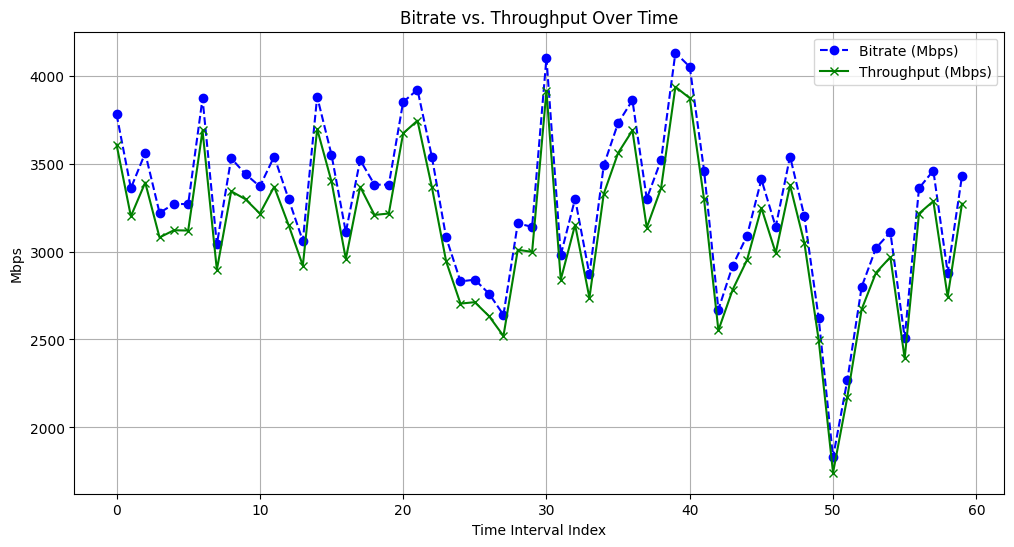

In [17]:
# Plot Bitrate and Throughput on the same graph
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Bitrate (Mbps)"], label="Bitrate (Mbps)", color='blue', linestyle='--', marker='o')
plt.plot(df.index, df["Throughput (Mbps)"], label="Throughput (Mbps)", color='green', linestyle='-', marker='x')
plt.xlabel("Time Interval Index")
plt.ylabel("Mbps")
plt.title("Bitrate vs. Throughput Over Time")
plt.grid()
plt.legend()
plt.show()

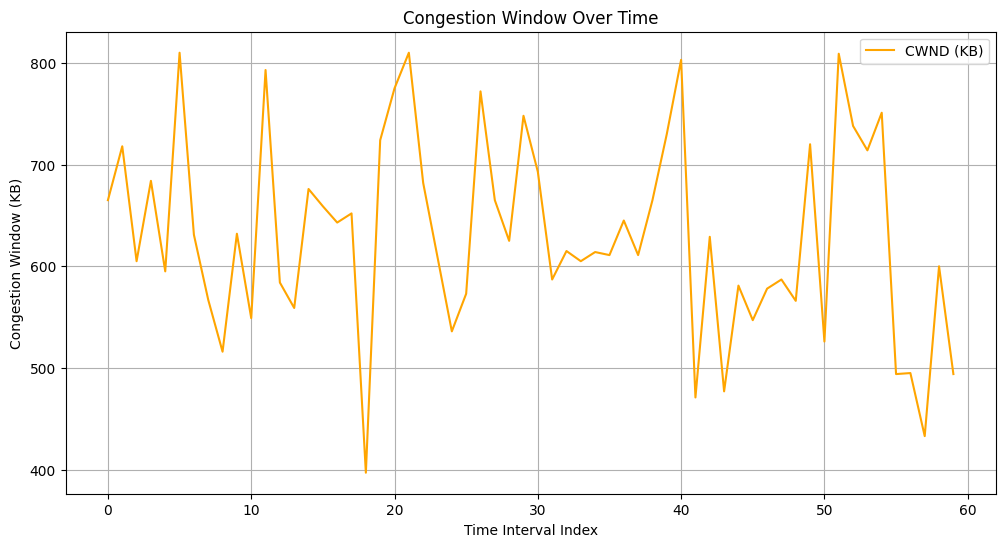

In [18]:
# Plot Congestion Window (CWND) over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["CWND (KB)"], label="CWND (KB)", color='orange')
plt.xlabel("Time Interval Index")
plt.ylabel("Congestion Window (KB)")
plt.title("Congestion Window Over Time")
plt.grid()
plt.legend()
plt.show()

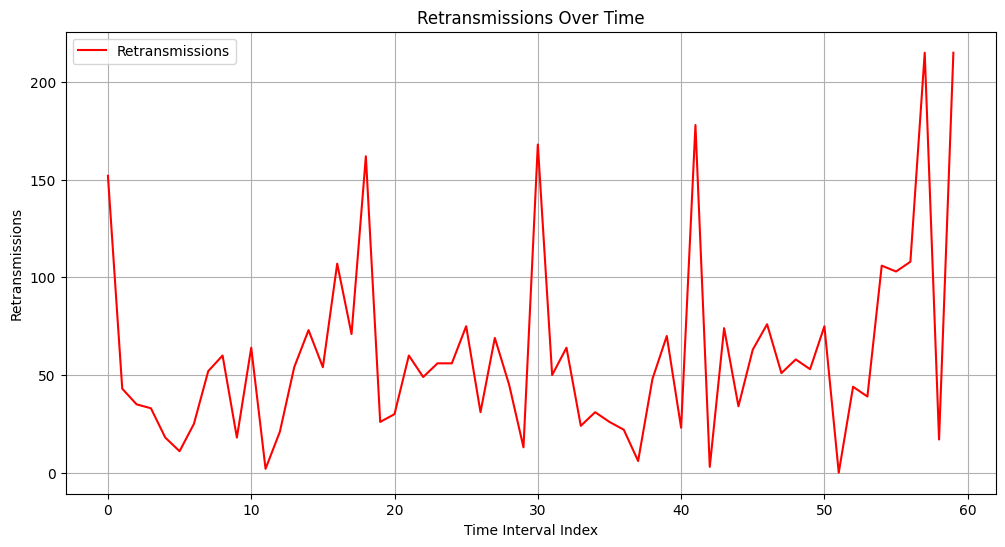

In [19]:
# Plot Retransmissions over time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Retransmissions"], label="Retransmissions", color='red')
plt.xlabel("Time Interval Index")
plt.ylabel("Retransmissions")
plt.title("Retransmissions Over Time")
plt.grid()
plt.legend()
plt.show()

RTT

In [22]:
# Load the CSV file (replace 'rtt_analysis.csv' with your file path)
df = pd.read_csv("../data/bulk_traffic/rtt_cubic.csv")

df

# Filter out rows where RTT is NaN
df = df[df["tcp.analysis.ack_rtt"].notna()]

# Convert RTT to milliseconds (optional, if it's in seconds)
df["RTT (ms)"] = df["tcp.analysis.ack_rtt"] * 1000

# Plot RTT over time
plt.figure(figsize=(12, 6))
plt.plot(df["frame.time"], df["RTT (ms)"], label="RTT (ms)", color="blue")
plt.xlabel("Time (s)")
plt.ylabel("RTT (ms)")
plt.title("RTT Over Time")
plt.grid()
plt.legend()
plt.show()

,No.,Time,Source,Destination,Protocol,Length,Info
0,4,0.677969,76.53.235.253,172.31.46.6,TCP,66,52673 > 22 [ACK] Seq=1 Ack=257 Win=2046 Len=...
1,6,1.879143,172.31.46.6,76.53.235.253,SSH,118,Server: Encrypted packet (len=52)
2,11,1.919876,76.53.235.253,172.31.46.6,TCP,66,52673 > 22 [ACK] Seq=37 Ack=593 Win=2042 Len...
3,13,3.077560,172.31.46.6,76.53.235.253,SSH,102,Server: Encrypted packet (len=36)
4,14,3.119016,76.53.235.253,172.31.46.6,TCP,66,52673 > 22 [ACK] Seq=73 Ack=629 Win=2047 Len...
...,...,...,...,...,...,...,...
133801,5831957,223.562113,76.53.235.253,172.31.46.6,TCP,66,53989 > 22 [ACK] Seq=1642 Ack=1723 Win=13100...
133802,5831959,223.611610,172.31.46.6,76.53.235.253,SSHv2,110,Server: Encrypted packet (len=44)
133803,5831960,223.652548,76.53.235.253,172.31.46.6,TCP,66,53989 > 22 [ACK] Seq=1710 Ack=1767 Win=13100...
133804,5831962,223.705863,172.31.46.6,76.53.235.253,SSHv2,94,Server: Encrypted packet (len=28)
